In [1]:
from cmeutils.structure import (
    bond_distribution,
    angle_distribution,
    dihedral_distribution,
)
from cmeutils.plotting import get_histogram

import gsd.hoomd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

import os

# Bond Distributions

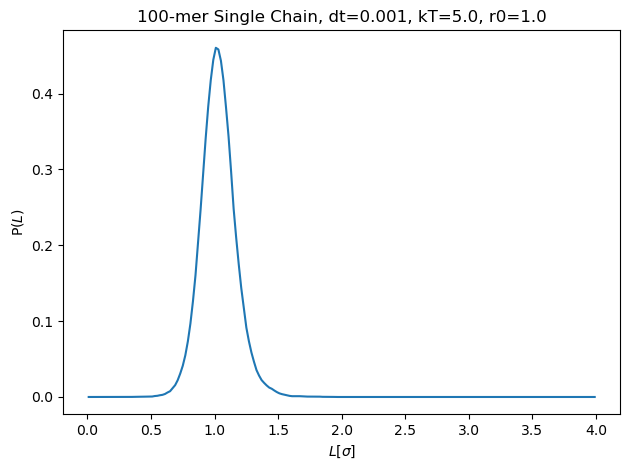

In [2]:
fig = plt.figure()
chains = 1
bond = "AA"
nbins=200
weight_dist = np.zeros(nbins)
adist = bond_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=bond[0],
    B_name=bond[1],
    histogram=True,
    normalize=True,
    start=0,
    bins=nbins
)
smooth = signal.savgol_filter(adist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(adist[:,0], weight_dist/7, markersize=0)

plt.xlabel(r"$L$[$\sigma$]")
plt.ylabel(r"P($L$)")
plt.title("100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")
fig.tight_layout()

#### MuPT implementation using MDAnalysis 
##### (@jola3134| circa 7/2/25)

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))
from mugeo_distributions import mupt_bond_distribution

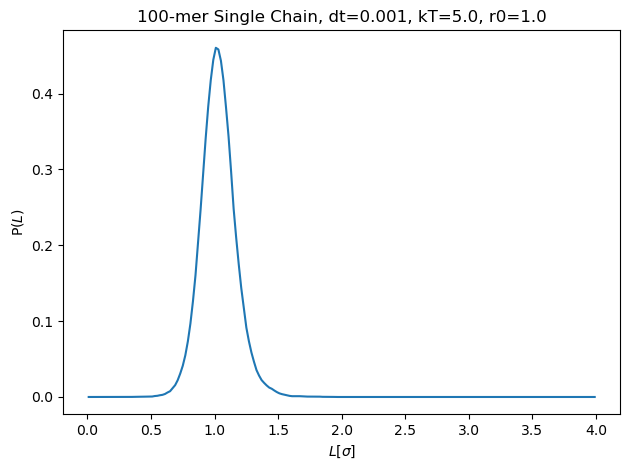

In [4]:
fig = plt.figure()
chains = 1
bond = "AA"
nbins=200
mupt_weight_dist = np.zeros(nbins)

bond_dist = mupt_bond_distribution(
    gsd_file=("trajectory1.gsd"),
    A_name=bond[0],
    B_name=bond[1],
    histogram=True,
    normalize=True,
    start=0,
    bins=nbins
)

smooth = signal.savgol_filter(bond_dist[:,1], window_length=7, polyorder=1)
mupt_weight_dist += smooth

plt.plot(bond_dist[:,0], mupt_weight_dist/7, markersize=0)

plt.xlabel(r"$L$[$\sigma$]")
plt.ylabel(r"P($L$)")
plt.title("100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")
fig.tight_layout()

#### Verify that the two methods give the same results

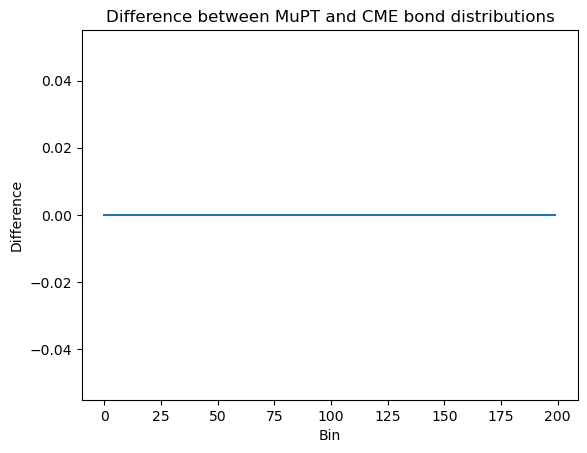

Max difference: 0.0


In [5]:
plt.plot((mupt_weight_dist/7) - (weight_dist/7))
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Difference between MuPT and CME bond distributions")
plt.show()
print("Max difference:", np.max(np.abs((mupt_weight_dist/7) - (weight_dist/7))))

# Angle Distributions

Text(0, 0.5, 'P($\\Theta$)')

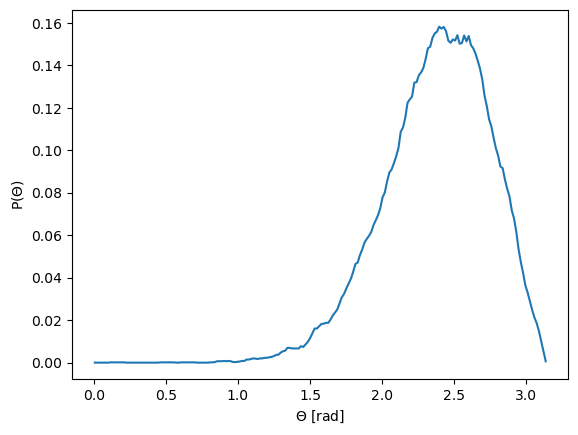

In [6]:
fig = plt.figure()
chains = 1
angle = "AAA"
nbins = 200
weight_dist = np.zeros(nbins)
adist = angle_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins
    )
smooth = signal.savgol_filter(adist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(adist[:,0], weight_dist/7, markersize=0)
    
plt.xlabel(r"$\Theta$ [rad]")
plt.ylabel(r"P($\Theta$)")

#### MuPT implementation using MDAnalysis 
##### (@jola3134| circa 7/2/25)

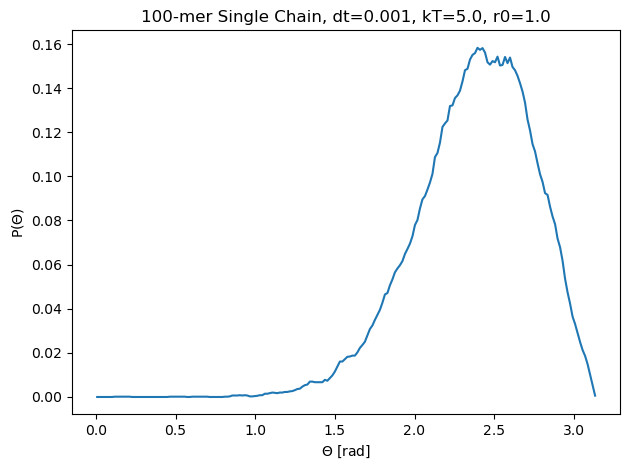

In [7]:
from mugeo_distributions import mupt_angle_distribution

fig = plt.figure()
chains = 1
angle = "AAA"
nbins = 200
mupt_weight_dist = np.zeros(nbins)

mupt_angle_dist = mupt_angle_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins
    )

smooth = signal.savgol_filter(mupt_angle_dist[:,1], window_length=7, polyorder=1)
mupt_weight_dist += smooth

plt.plot(mupt_angle_dist[:,0], mupt_weight_dist/7, markersize=0)

plt.xlabel(r"$\Theta$ [rad]")
plt.ylabel(r"P($\Theta$)")
plt.title("100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")
fig.tight_layout()

#### Verify that the two methods give the same results

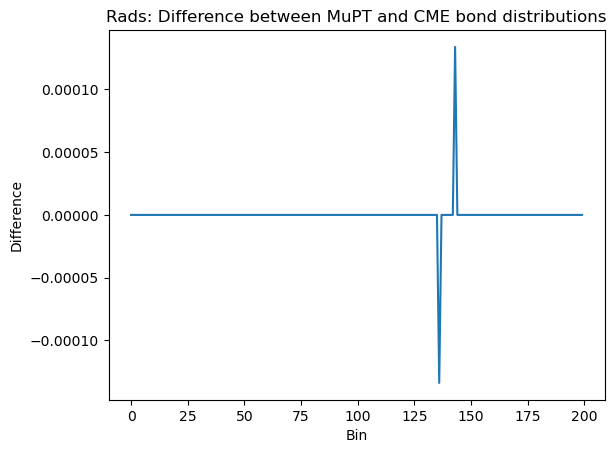

Max difference: 0.00013391301022881719


In [8]:
plt.plot((mupt_weight_dist/7) - (weight_dist/7))
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Rads: Difference between MuPT and CME bond distributions")
plt.show()
print("Max difference:", np.max(np.abs((mupt_weight_dist/7) - (weight_dist/7))))

##### NOTE the above discrepancy. I believe this has something to do with converting the angle into radians, as MDAnalysis natively supports angles in degrees. See below for the same calculation only using degrees.

#### Degrees

Text(0.5, 1.0, 'CMEUtils: 100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0')

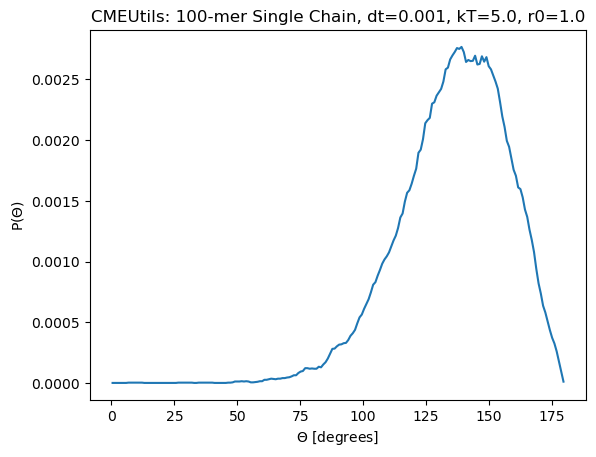

In [9]:
fig = plt.figure()
chains = 1
angle = "AAA"
nbins = 200
weight_dist = np.zeros(nbins)
adist = angle_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins,
    degrees=True
    )
smooth = signal.savgol_filter(adist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(adist[:,0], weight_dist/7, markersize=0)
    
plt.xlabel(r"$\Theta$ [degrees]")
plt.ylabel(r"P($\Theta$)")
plt.title("CMEUtils: 100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")

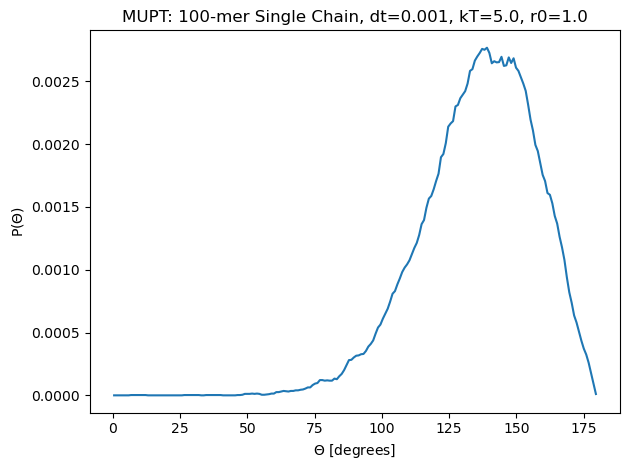

In [10]:
from mugeo_distributions import mupt_angle_distribution

fig = plt.figure()
chains = 1
angle = "AAA"
nbins = 200
mupt_weight_dist = np.zeros(nbins)

mupt_angle_dist = mupt_angle_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins,
    degrees=True
    )

smooth = signal.savgol_filter(mupt_angle_dist[:,1], window_length=7, polyorder=1)
mupt_weight_dist += smooth

plt.plot(mupt_angle_dist[:,0], mupt_weight_dist/7, markersize=0)

plt.xlabel(r"$\Theta$ [degrees]")
plt.ylabel(r"P($\Theta$)")
plt.title("MUPT: 100-mer Single Chain, dt=0.001, kT=5.0, r0=1.0")
fig.tight_layout()

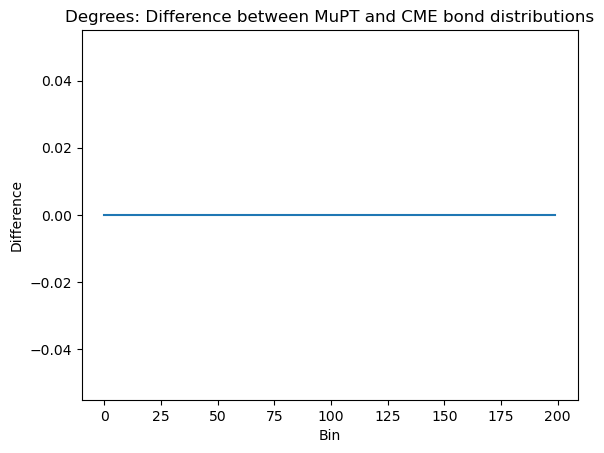

Max difference: 0.0


In [11]:
plt.plot((mupt_weight_dist/7) - (weight_dist/7))
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Degrees: Difference between MuPT and CME bond distributions")
plt.show()
print("Max difference:", np.max(np.abs((mupt_weight_dist/7) - (weight_dist/7))))

# Torsion Distributions

Text(0, 0.5, 'P($\\Phi$)')

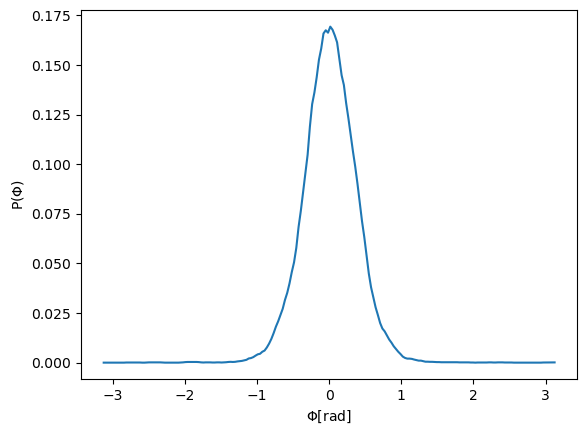

In [12]:
fig = plt.figure()
chains = 1
angle = "AAAA"
nbins = 200
weight_dist = np.zeros(nbins)

dihedist = dihedral_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    D_name=angle[3],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins
    )
smooth = signal.savgol_filter(dihedist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(dihedist[:,0], weight_dist/7, markersize=0)
    
plt.xlabel(r"$\Phi$[rad]")
plt.ylabel(r"P($\Phi$)")

Text(0, 0.5, 'P($\\Phi$)')

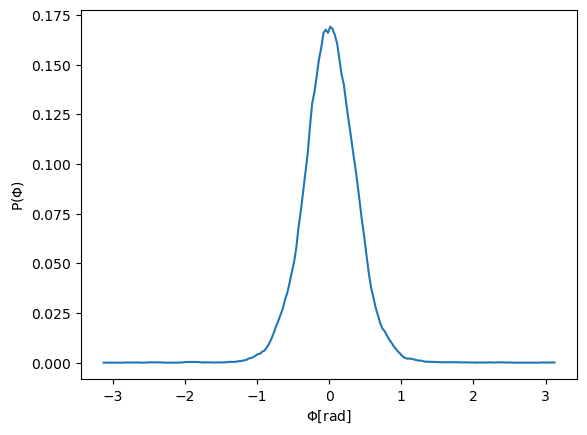

In [13]:
from mugeo_distributions import mupt_dihedral_distribution

fig = plt.figure()
chains = 1
angle = "AAAA"
nbins = 200
mupt_weight_dist = np.zeros(nbins)

mupt_dihedist = mupt_dihedral_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    D_name=angle[3],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins
    )
smooth = signal.savgol_filter(mupt_dihedist[:,1], window_length=7, polyorder=1)
mupt_weight_dist += smooth

plt.plot(mupt_dihedist[:,0], mupt_weight_dist/7, markersize=0)
    
plt.xlabel(r"$\Phi$[rad]")
plt.ylabel(r"P($\Phi$)")

##### Verify the two methods give the same results:

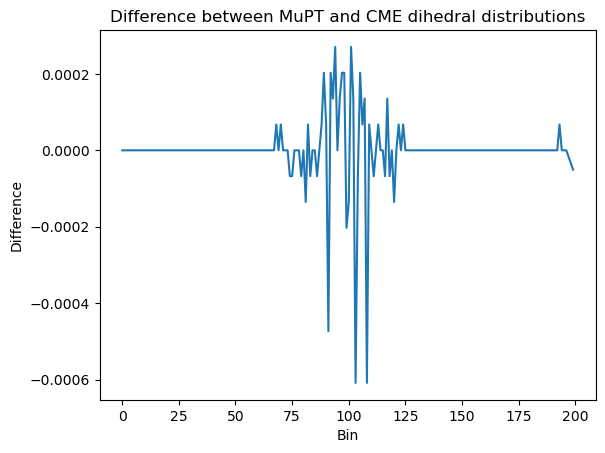

Max difference: 0.0006088210052671017


In [14]:
plt.plot((mupt_weight_dist/7) - (weight_dist/7))
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Difference between MuPT and CME dihedral distributions")
plt.show()
print("Max difference:", np.max(np.abs((mupt_weight_dist/7) - (weight_dist/7))))

##### NOTE the above discrepancy. I believe this has something to do with converting the angle into radians, as MDAnalysis natively supports angles in degrees. See below for the same calculation only using degrees.

Text(0, 0.5, 'P($\\Phi$)')

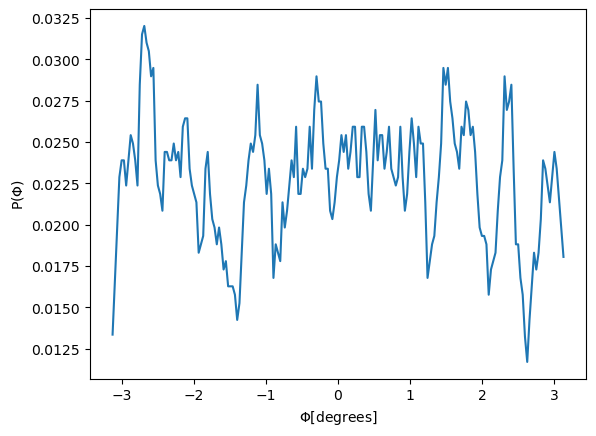

In [15]:
fig = plt.figure()
chains = 1
angle = "AAAA"
nbins = 200
weight_dist = np.zeros(nbins)

# NOTE there appears to be a bug in the CMEUtils dihedral distribution
# calculation that does not allow for degrees=True, I fixed the bug in my
# local version of CMEUtils so we could compare the two methods
# The bool degrees was never passed to the dihedral angle calculation
# function in CMEUtils

dihedist = dihedral_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    D_name=angle[3],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins,
    degrees=True
    )
smooth = signal.savgol_filter(dihedist[:,1], window_length=7, polyorder=1)
weight_dist += smooth

plt.plot(dihedist[:,0], weight_dist/7, markersize=0)
    
plt.xlabel(r"$\Phi$[degrees]")
plt.ylabel(r"P($\Phi$)")

Text(0, 0.5, 'P($\\Phi$)')

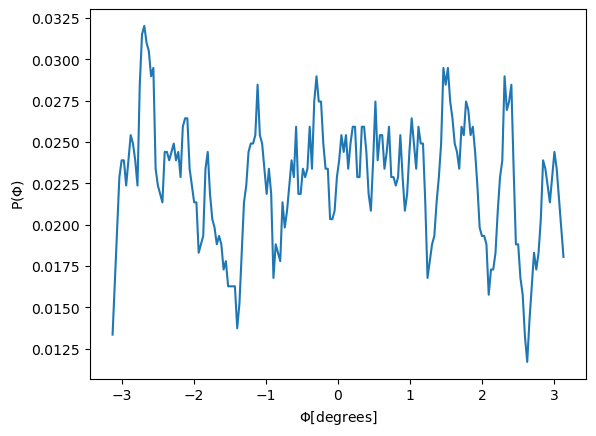

In [16]:
from mugeo_distributions import mupt_dihedral_distribution

fig = plt.figure()
chains = 1
angle = "AAAA"
nbins = 200
mupt_weight_dist = np.zeros(nbins)

mupt_dihedist = mupt_dihedral_distribution(
    gsd_file = ("trajectory1.gsd"),
    A_name=angle[0],
    B_name=angle[1],
    C_name=angle[2],
    D_name=angle[3],
    histogram=True,
    normalize=True,
    start =0,
    bins=nbins,
    degrees=True
    )
smooth = signal.savgol_filter(mupt_dihedist[:,1], window_length=7, polyorder=1)
mupt_weight_dist += smooth

plt.plot(mupt_dihedist[:,0], mupt_weight_dist/7, markersize=0)
    
plt.xlabel(r"$\Phi$[degrees]")
plt.ylabel(r"P($\Phi$)")

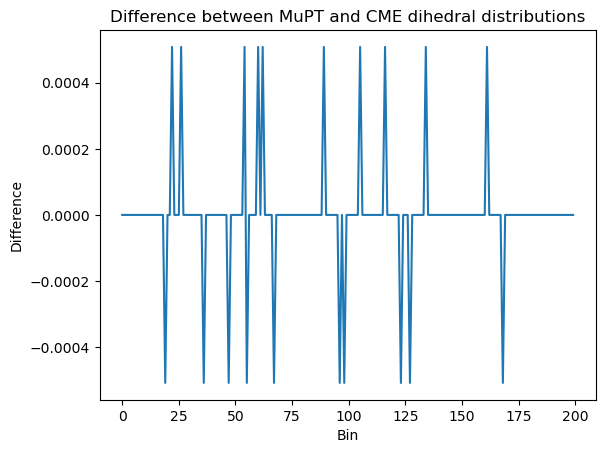

Max difference: 0.0005083036092488197


In [17]:
plt.plot((mupt_weight_dist/7) - (weight_dist/7))
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Difference between MuPT and CME dihedral distributions")
plt.show()
print("Max difference:", np.max(np.abs((mupt_weight_dist/7) - (weight_dist/7))))

#### Conclusion: MDAnalysis computes the angles/dihedrals in a slightly different order of operations than CMEutils.